In [1]:
from qiskit import *

In [2]:
circuit = QuantumCircuit(3,3)

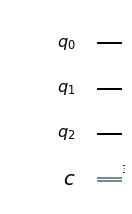

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

In [4]:
circuit.x(0)
# cirtuit.x caused state 1 on the q0
circuit.barrier()
circuit.draw('mpl')



In [5]:
# now we want to copy state from q0 to q2 using entanglement
# to do that we first:
# create gate H on q1 and then
# then i am applying controlled x gate (cx) bdetween q1 and q2
circuit.h(1)
circuit.cx(1,2)

In [6]:
circuit.draw('mpl')

In [7]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw('mpl')

In [8]:
circuit.barrier()
circuit.measure([0,1],[0,1])
# measure q0 and q1 and put results into classical bits c0 and 

#WHY FROM q0 to q1, not q0 to q2 ??? <--------------------------
circuit.draw('mpl')

In [9]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw('mpl')

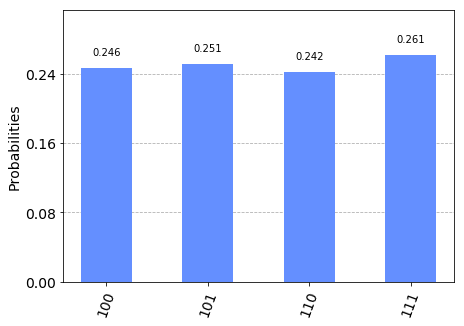

In [10]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
# histogram interpretation
# 100 post means 1 on c_2, 0 on c_1, 0 on c_0
# 101 post means 1 on c_2, 0 on c_1, 1 on c_0
# etc

In [11]:
print(counts)
# print interpretation:
# 100 had 252 shots and it was z 24.6 % of all shots

{'100': 252, '101': 257, '111': 267, '110': 248}
